In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# Online 사용시
# import os, types
# import pandas as pd
# from botocore.client import Config
# import ibm_boto3

# def __iter__(self): return 0

# # @hidden_cell
# # The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# # You might want to remove those credentials before you share the notebook.

# if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
#     endpoint_a2cd37142f6a4f1385640e6d0f7d33ae = 'https://s3.us.cloud-object-storage.appdomain.cloud'
# else:
#     endpoint_a2cd37142f6a4f1385640e6d0f7d33ae = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

# client_a2cd37142f6a4f1385640e6d0f7d33ae = ibm_boto3.client(service_name='s3',
#     ibm_api_key_id='AOkCYAcY96i7k9Kxhyr1SM0ylfrxlBmgI2MRQgICFgem',
#     ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
#     config=Config(signature_version='oauth'),
#     endpoint_url=endpoint_a2cd37142f6a4f1385640e6d0f7d33ae)

# body = client_a2cd37142f6a4f1385640e6d0f7d33ae.get_object(Bucket='testproject-donotdelete-pr-a7cyywjqdb9klp',Key='customers_orders.csv')['Body']
# # add missing __iter__ method, so pandas accepts body as file-like object
# if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# df = pd.read_csv(body)
# df.head()


In [2]:
# local 사용시 실행
df = pd.read_csv (r'TCBFDFS02_07.csv')
print(df.shape)
display(df)

(2000, 12)


,USER_ID,FIN_ASSET_SECTION_DIV,NONFIN_ASSET_SECTION_DIV,CRM_AGE_DIV,JOB_SECTION_DIV,SIDO_DIV,FINANCE_AMOUNT,CASH_AMOUNT,ACCOUNT_AMOUNT,INVEST_AMOUNT,INSURANCE_AMOUNT,ANNUITY_AMOUNT
0,2000000000,1.0,1.0,29.0,7.0,10.0,2.432545e+07,1.702500e+06,6810000.0,6.861365e+06,3268800.0,5.682789e+06
1,2000000001,4.0,2.0,50.0,12.0,10.0,7.796854e+07,4.217000e+06,33736000.0,2.060324e+07,10120800.0,9.291501e+06
2,2000000002,1.0,2.0,29.0,3.0,21.0,2.656856e+07,3.242000e+05,6484000.0,1.120400e+07,3242000.0,5.314363e+06
3,2000000003,1.0,2.0,40.0,10.0,30.0,2.963063e+07,1.896600e+06,12644000.0,1.199225e+07,3097780.0,NaN
4,2000000004,5.0,4.0,20.0,12.0,34.0,2.749925e+08,2.111000e+07,84440000.0,7.574282e+07,23643200.0,7.005648e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2907281665,9.0,NaN,NaN,NaN,NaN,3.003484e+10,NaN,NaN,NaN,NaN,NaN
1996,2907281666,9.0,NaN,NaN,NaN,NaN,8.916232e+10,NaN,NaN,NaN,NaN,NaN
1997,2907281667,9.0,NaN,NaN,NaN,NaN,7.500888e+09,NaN,NaN,NaN,NaN,NaN
1998,2907281668,9.0,NaN,NaN,NaN,NaN,1.979311e+09,NaN,NaN,NaN,NaN,NaN


In [3]:
# read column names, 콜룸명 읽어보기
# df.info()
print(df.columns.values.tolist())
# df.columns.values.tolist()

['USER_ID', 'FIN_ASSET_SECTION_DIV', 'NONFIN_ASSET_SECTION_DIV', 'CRM_AGE_DIV', 'JOB_SECTION_DIV', 'SIDO_DIV', 'FINANCE_AMOUNT', 'CASH_AMOUNT', 'ACCOUNT_AMOUNT', 'INVEST_AMOUNT', 'INSURANCE_AMOUNT', 'ANNUITY_AMOUNT']


In [ ]:
#delete unnecessary columns, 불필요한 콜룸 지우기
# df.drop(['CUSTNAME',
#  'GenderCode',
#  'CITY',
#  'CREDITCARD_TYPE',
#  'ORDER_ID',
#  'ORDER_DATE',
#  'ORDER_TIME',
#  'AGE',
#  'T_TYPE',
#  'PURCHASE_TOUCHPOINT',
#  'PURCHASE_STATUS',
#  'GENERATION',], axis=1,inplace=True)

# print(df.shape)
# display(df)

In [6]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

USER_ID : [2000000000 2000000001 2000000002 ... 2907281667 2907281668 2907281669]
FIN_ASSET_SECTION_DIV : [ 1.  4.  5.  3.  2.  0.  6.  7.  9.  8. 99. nan]
NONFIN_ASSET_SECTION_DIV : [ 1.  2.  4.  3.  0.  6.  5.  7. nan]
CRM_AGE_DIV : [29. 50. 40. 20. 49. 45. 30. 35. 25. 65. 59. 69. 55. 60. 39.  0. nan]
JOB_SECTION_DIV : [ 7. 12.  3. 10.  8.  9. 11.  1.  2.  4.  5. 13.  6. nan]
SIDO_DIV : [10. 21. 30. 34.  1.  0. 31. 27. 50. 57. 24. 44. 46. 36. 54. 63. 61. 41.
 nan]
FINANCE_AMOUNT : [2.43254547e+07 7.79685372e+07 2.65685589e+07 ... 7.50088800e+09
 1.97931100e+09 1.13322315e+11]
CASH_AMOUNT : [1702500.    4217000.001  324200.001 ... 7982500.    1224999.999
         nan]
ACCOUNT_AMOUNT : [ 6810000. 33736000.  6484000. ... 31930000.  9800000.       nan]
INVEST_AMOUNT : [ 6861365.464 20603236.23  11203996.265 ... 34277500.325  3110398.206
          nan]
INSURANCE_AMOUNT : [ 3268800. 10120800.  3242000. ... 20550500. 12772000.  2940000.]
ANNUITY_AMOUNT : [ 5682789.189  9291500.932  5314362.

In [9]:
df = df.fillna(0)

df = df.astype('int64')

NameError: name 'df_csv' is not defined

In [11]:
#check if dtype has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   USER_ID                   2000 non-null   int64
 1   FIN_ASSET_SECTION_DIV     2000 non-null   int64
 2   NONFIN_ASSET_SECTION_DIV  2000 non-null   int64
 3   CRM_AGE_DIV               2000 non-null   int64
 4   JOB_SECTION_DIV           2000 non-null   int64
 5   SIDO_DIV                  2000 non-null   int64
 6   FINANCE_AMOUNT            2000 non-null   int64
 7   CASH_AMOUNT               2000 non-null   int64
 8   ACCOUNT_AMOUNT            2000 non-null   int64
 9   INVEST_AMOUNT             2000 non-null   int64
 10  INSURANCE_AMOUNT          2000 non-null   int64
 11  ANNUITY_AMOUNT            2000 non-null   int64
dtypes: int64(12)
memory usage: 187.6 KB


In [13]:
df.isnull().sum()

USER_ID                     0
FIN_ASSET_SECTION_DIV       0
NONFIN_ASSET_SECTION_DIV    0
CRM_AGE_DIV                 0
JOB_SECTION_DIV             0
SIDO_DIV                    0
FINANCE_AMOUNT              0
CASH_AMOUNT                 0
ACCOUNT_AMOUNT              0
INVEST_AMOUNT               0
INSURANCE_AMOUNT            0
ANNUITY_AMOUNT              0
dtype: int64

<AxesSubplot:>

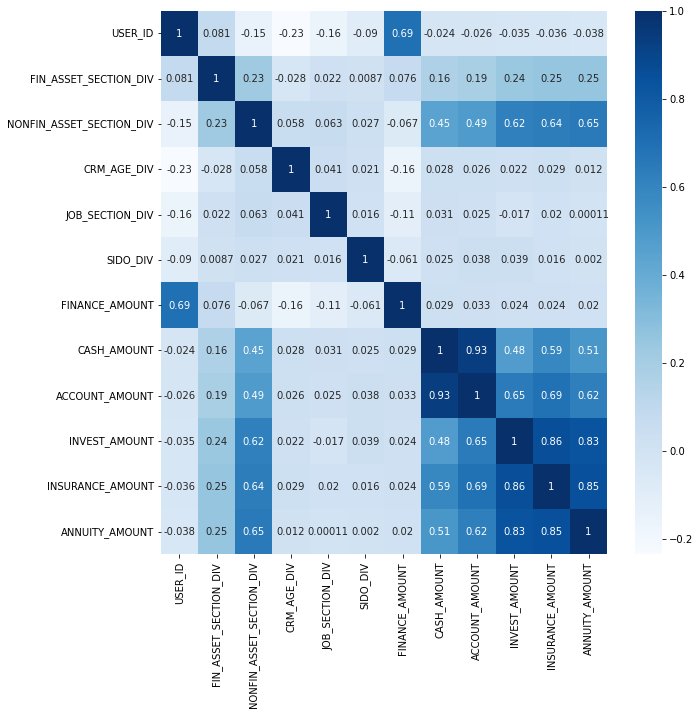

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
#sum up each customer's purchases, 구매자별 사용 제품 리스트 합산
df = df.groupby(by=['CUST_ID'], as_index=False).sum()

In [ ]:
#delet customer id column, 고객 아이디 콜룸 삭제
df.drop(['CUST_ID'], axis=1,inplace=True)

In [ ]:
#review after deletion
print(df.shape)
display(df)

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
X = df[df.columns.values.tolist()].values.astype('int32')

In [ ]:
# number of clusters 15(choose cluster number as number of products / 2)
# 클러스터 15개 선택(상품 갯수 / 2로 클러스터 정함)
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

In [ ]:
# predict cluster for each dataset. Used for precomputing often used product
# 사용자별 클러스터 추측, 추후 클러스터별 많이 사용된 제품 추천에 이용
y_kmeans = kmeans.predict(X)
y_kmeans

In [ ]:
# Make result as dataframe. (Used for review and precomputing often used products)
# 사용자별 클러스터 추측 결과 dataframe으로 변경, 추후 클러스터별 많이 사용된 제품 추천에 이용
df_y = pd.DataFrame(y_kmeans, columns = {"cluster"})
df_y

In [ ]:
# Review cluster, check distribution of users for each clusters(expect about distributed count)
# 클러스터별 사용자 맵핑된 갯수 확인(골고루 분포면 좋음)
sns.histplot(df_y.cluster,bins=15)

In [ ]:
# Add cluster result to data frame. Used for precomputing often used products
# 사용자별 클러스터 추측 결과 dataframe에 추가, 추후 클러스터별 많이 사용된 제품 추천에 이용
df["cluster"] = df_y["cluster"]

In [ ]:
# review cluster - 2
# 상품별 
grouped_df = df.groupby(["cluster"], as_index=False).sum()
grouped_df.drop(['cluster'], axis=1,inplace=True)
df_a = grouped_df.T
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,29], colormap='gist_rainbow')

In [ ]:
#get most found item per each cluster
for x in range(grouped_df.shape[0]):
    df_a['rank_'+str(x)] = df_a[x].rank(method='first', ascending=False)

In [ ]:
def get_rank_from_cluster(a):
    result = []
    for x in range(1, 6):
        result.append(df_a[df_a['rank_'+str(a)] == x].index[0])
    return result

for x in range(15):
    answer = get_rank_from_cluster(x)
    print(answer)